# Mental Health In Technology Related Jobs

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch

## Importing Data

In [2]:
data = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

# Rename columns to facilitate easy referencing
data.columns=['self_employed','n_employees','tech_company','tech_related_role','mh_benefits_provided',
              'mh_options_awareness','mh_formal_discussion','mh_resources_offered','anonimity_protection','medical_leave',
              'neg_conceq_mh_employer_discussion','neg_conceq_ph_employer_discussion','comfort_discussion_mh_coworkers','comfort_discussion_mh_supervisor',
              'employer_mh_ph_reaction','observed_neg_conceq_coworker_mh','medical_coverage_mh','mh_resources_awareness','diagnosed_revealed_clients',
              'diagnosed_revealed_clients_neg_conceq','diagnosed_revealed_coworkers','diagnosed_revealed_coworkers_neg_conceq','mh_affects_productivity',
              'mh_affects_productivity_persentage','previous_employers','mh_benefits_prev_employer_provided','aware_of_mh_options_prev_employer_provided',
              'mh_formal discussion_prev','mh_resources_offered_prev','anonimity_protection_prev','neg_conceq_mh_prev_employer_discussion',
              'neg_conceq_ph_prev_employer_discussion','mh_discussion_prev_coworkers_willingness','mh_discussion_supervisor_willingness',
              'prev_employer_mh_ph_reaction','observed_neg_conceq_prev_coworker_mh','interview_ph_discussion_willingness',
              'reason_discuss_ph_interview','interview_mh_discussion_willingness','reason_discuss_mh_interview','mh_diagnosed_career_affect',
              'mh_issue_neg_relationship_coworkers','mh_discussion_family_willingness','bad_response_mh_issue','impact_others_revealed_mh_issues',
              'family_history_mental_illness','past_mh_disorders','current_mh_disorder','diagnosed_conditions','believed_conditions',
              'diagnosed_professional','diagnosed_professional_conditions','sought_treatment_professional','work_interference_treated_effectively',
              'work_interference_not_treated_effectively','age','gender','country_live','US_state_live','country_work','US_state_work','work_position','remote_work']

data.head()

,self_employed,n_employees,tech_company,tech_related_role,mh_benefits_provided,mh_options_awareness,mh_formal_discussion,mh_resources_offered,anonimity_protection,medical_leave,...,work_interference_treated_effectively,work_interference_not_treated_effectively,age,gender,country_live,US_state_live,country_work,US_state_work,work_position,remote_work
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


## Data Profiling

In [3]:
print(data.shape)

(1433, 63)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   self_employed                               1433 non-null   int64  
 1   n_employees                                 1146 non-null   object 
 2   tech_company                                1146 non-null   float64
 3   tech_related_role                           263 non-null    float64
 4   mh_benefits_provided                        1146 non-null   object 
 5   mh_options_awareness                        1013 non-null   object 
 6   mh_formal_discussion                        1146 non-null   object 
 7   mh_resources_offered                        1146 non-null   object 
 8   anonimity_protection                        1146 non-null   object 
 9   medical_leave                               1146 non-null   object 
 10  neg_conceq_m

In [5]:
data.apply(lambda x: x.unique().tolist(), axis=0)

self_employed                                                      [0, 1]
n_employees             [26-100, 6-25, nan, More than 1000, 100-500, 5...
tech_company                                              [1.0, nan, 0.0]
tech_related_role                                         [nan, 1.0, 0.0]
mh_benefits_provided    [Not eligible for coverage / N/A, No, nan, Yes...
                                              ...                        
US_state_live           [nan, Illinois, Tennessee, Virginia, Californi...
country_work            [United Kingdom, United States of America, Can...
US_state_work           [nan, Illinois, Tennessee, Virginia, Californi...
work_position           [Back-end Developer, Back-end Developer|Front-...
remote_work                                    [Sometimes, Never, Always]
Length: 63, dtype: object

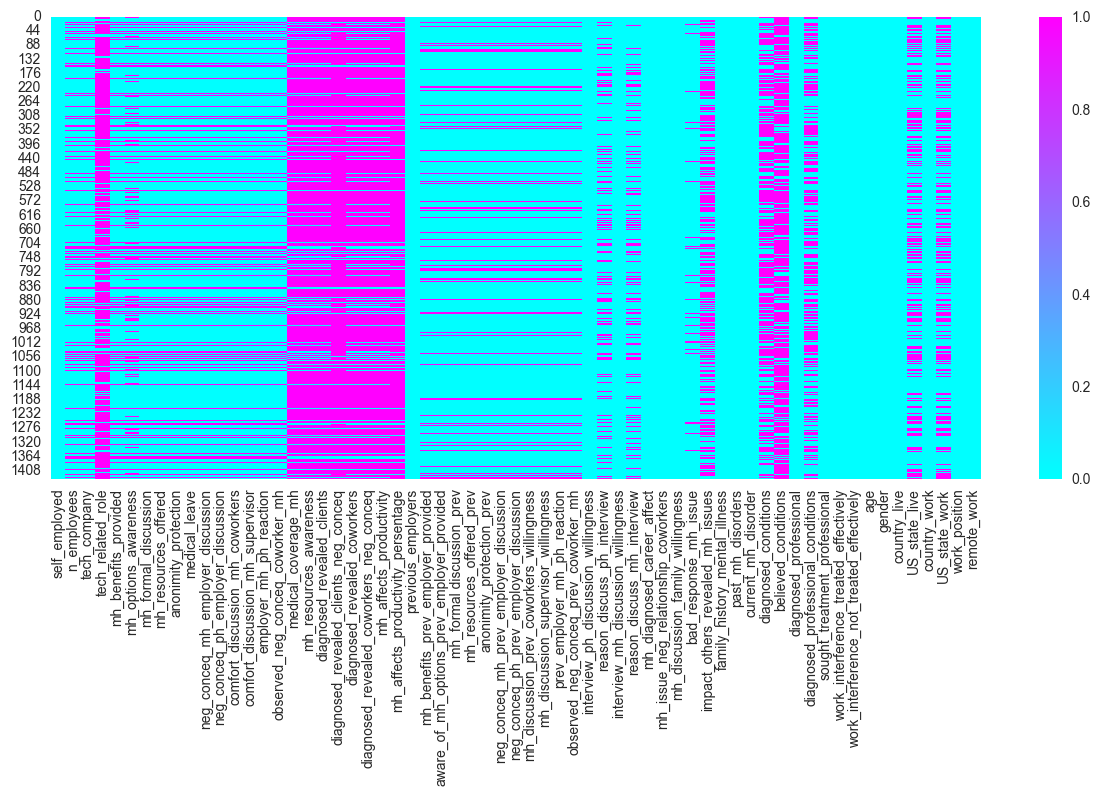

In [6]:
plt.figure(figsize=(15,6))
sns.heatmap(data.isnull(), cmap='cool')
plt.show()

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
self_employed,1433.0,0.200279,0.400349,0.0,0.0,0.0,0.0,1.0
tech_company,1146.0,0.770506,0.420691,0.0,1.0,1.0,1.0,1.0
tech_related_role,263.0,0.942966,0.232350,0.0,1.0,1.0,1.0,1.0
medical_coverage_mh,287.0,0.644599,0.479471,0.0,0.0,1.0,1.0,1.0
previous_employers,1433.0,0.882066,0.322643,0.0,1.0,1.0,1.0,1.0
sought_treatment_professional,1433.0,0.585485,0.492810,0.0,0.0,1.0,1.0,1.0
age,1433.0,34.286113,11.290931,3.0,28.0,33.0,39.0,323.0


Mean of the age variable is higher than the median, which means that it is right-skewed. 
Also, based on the maximum and minimum values, there are some outliers. 

In [8]:
data.describe(include="object").T

,count,unique,top,freq
n_employees,1146,6,26-100,292
mh_benefits_provided,1146,4,Yes,531
mh_options_awareness,1013,3,No,354
mh_formal_discussion,1146,3,No,813
mh_resources_offered,1146,3,No,531
anonimity_protection,1146,3,I don't know,742
medical_leave,1146,6,Somewhat easy,281
neg_conceq_mh_employer_discussion,1146,3,Maybe,487
neg_conceq_ph_employer_discussion,1146,3,No,837
comfort_discussion_mh_coworkers,1146,3,Maybe,479


## Data Preprocessing

In [9]:
# Drop columns with more than 60% missing values, as imputing them without domain knowledge would introduce bias to the model
nan_percentages = data.isna().mean() * 100
columns_to_drop = nan_percentages[nan_percentages > 60].index
print(columns_to_drop)
data = data.drop(columns=columns_to_drop, axis=1)                                     

Index(['tech_related_role', 'medical_coverage_mh', 'mh_resources_awareness',
       'diagnosed_revealed_clients', 'diagnosed_revealed_clients_neg_conceq',
       'diagnosed_revealed_coworkers',
       'diagnosed_revealed_coworkers_neg_conceq', 'mh_affects_productivity',
       'mh_affects_productivity_persentage', 'diagnosed_conditions',
       'believed_conditions'],
      dtype='object')


In [10]:
print(len(data.reason_discuss_ph_interview.unique()))
print(len(data.reason_discuss_mh_interview.unique()))

1086
1081


In [11]:
# We can see that there are 1086 and 1081 unique values in the 'reason_discuss_ph_interview' and 'reason_discuss_mh_interview' variables correspondingly. 
# So, it is approximately a unique value for each of the instances. Hence, this is not a variable that we can use and we will drop it.
data=data.drop(columns=['reason_discuss_ph_interview','reason_discuss_mh_interview'], axis=1)

In [12]:
# Drop one of each two correlated columns
data=data.drop(columns=["US_state_live", "country_live"], axis=1)

### collapsing categories

In [13]:
# Function to get a frequency of a category of a column
def check_freq(x):
    freq = {}
    for c in set(x):
       freq[c] = x.count(c)
    return freq
# Function to get unique categories from a column
def get_categories_freq(y):
    categories=[x for x in y.tolist() if type(x) is not float] 
    all_list=[]
    for i in categories:
        for j in i.split('|'):
            all_list.append(j)
    return check_freq(all_list)

print(get_categories_freq(data['diagnosed_professional_conditions']))

data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.lower() 
# Collapse categories 
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('gender identity disorder','gender dysphoria')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('attention deficit disorder','attention deficit hyperactivity disorder')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('attention deficit hyperactivity disorder (but not the hyperactive version)','attention deficit hyperactivity disorder')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('add (w/o hyperactivity)','attention deficit hyperactivity disorder')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('attention deficit disorder (but not the hyperactive version)','attention deficit hyperactivity disorder')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('posttraumatic stress disourder','post-traumatic stress disorder')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('aspergers','autism')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('asperger syndrome','autism')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace("autism (asperger's)",'autism')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('autism spectrum disorder','autism')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('autism - while not a "mental illness", still greatly affects how i handle anxiety','autism')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('pdd-nos','autism')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('pdd-nos (see above)','autism')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('schizotypal personality disorder','psychotic disorder (schizophrenia, schizoaffective, etc)')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('mcd (when it was diagnosed, the ultra-mega "disorder" adhd didn\'t exist yet)','attention deficit hyperactivity disorder')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('autism (see above)','autism')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('burn out','mood disorder (depression, bipolar disorder, etc)')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('suicidal ideation','mood disorder (depression, bipolar disorder, etc)')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].str.replace('seasonal affective disorder','mood disorder (depression, bipolar disorder, etc)')
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].map({'depression':'mood disorder (depression, bipolar disorder, etc)'}).fillna(data['diagnosed_professional_conditions'])
# Output unique values of the updated column
print(get_categories_freq(data['diagnosed_professional_conditions']))
print(len(get_categories_freq(data['diagnosed_professional_conditions'])))

{'Autism - while not a "mental illness", still greatly affects how I handle anxiety': 1, 'PDD-NOS': 1, 'Attention Deficit Disorder': 1, 'Aspergers': 1, 'Anxiety Disorder (Generalized, Social, Phobia, etc)': 373, 'Obsessive-Compulsive Disorder': 40, 'Autism': 2, 'autism spectrum disorder': 1, 'Gender Dysphoria': 1, 'Personality Disorder (Borderline, Antisocial, Paranoid, etc)': 28, 'Seasonal Affective Disorder': 1, 'Addictive Disorder': 15, 'Autism Spectrum Disorder': 1, 'PDD-NOS (see above)': 1, 'MCD (when it was diagnosed, the ultra-mega "disorder" ADHD didn\'t exist yet)': 1, 'Post-traumatic Stress Disorder': 70, 'Burn out': 1, 'Attention Deficit Hyperactivity Disorder': 134, 'Suicidal Ideation': 1, 'Intimate Disorder': 1, 'Depression': 3, 'ADD (w/o Hyperactivity)': 1, 'Asperger Syndrome': 1, 'Dissociative Disorder': 10, 'Gender Identity Disorder': 1, 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)': 8, "Autism (Asperger's)": 1, 'posttraumatic stress disourder': 1, 'Substan

In [14]:
print(get_categories_freq(data['work_position']))
# Collapse categories 
data['work_position'] = data['work_position'].str.replace('Back-end Developer|Front-end Developer','Developer')
data['work_position'] = data['work_position'].str.replace('Front-end Developer|Back-end Developer','Developer')
data['work_position'] = data['work_position'].str.replace('Supervisor/Team Lead|Executive Leadership','Manager')
data['work_position'] = data['work_position'].str.replace('Executive Leadership|Supervisor/Team Lead','Manager')
data['work_position'] = data['work_position'].str.replace('DevOps/SysAdmin|Dev Evangelist/Advocate','Technical Operations')
data['work_position'] = data['work_position'].str.replace('Dev Evangelist/Advocate|DevOps/SysAdmin','Technical Operations')
data['work_position'] = data['work_position'].str.replace('Back-end Developer','Developer')
data['work_position'] = data['work_position'].str.replace('Front-end Developer','Developer')
data['work_position'] = data['work_position'].str.replace('Supervisor/Team Lead','Manager')
data['work_position'] = data['work_position'].str.replace('Executive Leadership','Manager')
data['work_position'] = data['work_position'].str.replace('DevOps/SysAdmin','Technical Operations')
data['work_position'] = data['work_position'].str.replace('Dev Evangelist/Advocate','Technical Operations')
# Output unique values of the updated column
print(get_categories_freq(data['work_position']))

{'Executive Leadership': 101, 'Front-end Developer': 502, 'HR': 12, 'Support': 168, 'Designer': 135, 'Dev Evangelist/Advocate': 99, 'Sales': 31, 'Other': 187, 'Back-end Developer': 737, 'DevOps/SysAdmin': 282, 'Supervisor/Team Lead': 277, 'One-person shop': 161}
{'Technical Operations': 353, 'HR': 12, 'Designer': 135, 'Other': 187, 'Sales': 31, 'Developer': 928, 'Manager': 342, 'Support': 168, 'One-person shop': 161}


In [15]:
freq_gender = (data.groupby('gender').size()) 
freq_gender.sort_values()

gender
 Female                    1
Male/genderqueer           1
none of your business      1
M|                         1
Other                      1
                        ... 
M                         86
female                    95
Female                   153
male                     249
Male                     610
Length: 70, dtype: int64

In [16]:
data['gender'] = data['gender'].str.lower()

# Create a dictionary of replacements
replacements = {
    #male
    'male ':'male',
    'm':'male',
    'man':'male', 
    'male.':'other',
    'sex is male':'male',
    'malr':'male',
    'dude':'male',
    'cis man':'male',
    'cis male':'male',
    'cisdude':'male',
    'male (cis)':'male',
    'm|':'male',
    "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take? ":'male',
    #female
    'i identify as female.':'female',
    'female ':'female',
    'f':'female',
    'female assigned at birth ':'female',
    'woman':'female',
    'fm':'female',
    'female/woman':'female',
    'cisgender female':'female',
    'afab':'female',
    'fem':'female',
    'cis-woman':'female',
    'cis female ':'female',
    'female (props for making this a freeform field, though)':'female',
    ' female':'female',
    'female-bodied; no feelings about gender':'female',
    #other
    'transgender woman':'other gender',
    'transitioned, m2f':'other gender',
    'male (trans, ftm)':'other gender',
    'mtf':'other gender',
    'other/transfeminine':'other gender',
    'genderfluid':'other gender',
    'genderfluid (born female)':'other gender',
    'genderqueer':'other gender',
    'nonbinary':'other gender',
    'genderqueer woman':'other gender',
    'female or multi-gender femme':'other gender',
    'agender':'other gender',
    'fluid':'other gender',
    'male/genderqueer':'other gender',
    'queer':'other gender',
    'genderflux demi-girl':'other gender',
    'nb masculine':'other gender',
    'enby':'other gender',
    'bigender':'other gender',
    'androgynous':'other gender',
    'male 9:1 female, roughly':'other gender',
    'none of your business':'other gender',
    'human':'other gender',
    'mail':'other gender',
    'unicorn':'other gender',
    'non-binary':'other gender',
    'other':'other gender'
    }
# Replace values 
data['gender'] = data['gender'].map(replacements).fillna(data['gender'])
data['gender'] = data['gender'].map(replacements).fillna(data['gender'])
freq_gender = (data.groupby('gender').size())
freq_gender.sort_values()

gender
other gender      35
female           340
male            1055
dtype: int64

In [17]:
freq_gender = (data.groupby('country_work').size()) 
freq_gender.sort_values()

country_work
Iran                          1
United Arab Emirates          1
Turkey                        1
Slovakia                      1
Serbia                        1
Lithuania                     1
Japan                         1
Venezuela                     1
Hungary                       1
Guatemala                     1
Greece                        1
Ecuador                       1
Costa Rica                    1
Vietnam                       1
China                         1
Argentina                     1
Bangladesh                    1
Brunei                        1
Pakistan                      2
Other                         2
Colombia                      2
Mexico                        2
Bosnia and Herzegovina        2
Israel                        2
Afghanistan                   2
Estonia                       2
Czech Republic                3
Spain                         3
Italy                         3
Norway                        3
Chile                      

In [18]:
region_replacements = {
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'Netherlands': 'Europe',
    'Czech Republic': 'Europe',
    'Lithuania': 'Europe',
    'France': 'Europe',
    'Poland': 'Europe',
    'Belgium': 'Europe',
    'Denmark': 'Europe',
    'Sweden': 'Europe',
    'Spain': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Finland': 'Europe',
    'Slovakia': 'Europe',
    'Austria': 'Europe',
    'Greece': 'Europe',
    'Romania': 'Europe',
    'Serbia': 'Europe',
    'Estonia': 'Europe',
    'Hungary': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Switzerland': 'Europe',
    'Norway': 'Europe',
    'Bulgaria': 'Europe',
    'Argentina': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Ecuador': 'South America',
    'Colombia': 'South America',
    'Venezuela': 'South America',
    'Costa Rica': 'North America',
    'Mexico': 'North America',
    'United States of America': 'North America',
    'Guatemala': 'North America',
    'Canada': 'North America',
    'New Zealand': 'Australia',
    'Australia': 'Australia',
    'Russia': 'Other Country',
    'South Africa': 'Africa',
    'China': 'Asia',
    'Taiwan': 'Asia',
    'Israel': 'Asia',
    'Brunei': 'Asia',
    'Japan': 'Asia',
    'Iran': 'Asia',
    'India': 'Asia',
    'Vietnam': 'Asia',
    'Bangladesh': 'Asia',
    'Algeria': 'Africa',
    'Pakistan': 'Asia',
    'Afghanistan': 'Asia',
    'Other':'Other Country',
    'Turkey':'Asia',
    'United Arab Emirates':'Asia'
}
data['country_work'] = data['country_work'].map(region_replacements).fillna(data['country_work'])

freq_country_live = (data.groupby('country_work').size())
freq_country_live.sort_values()


country_work
Africa             4
Other Country     11
South America     18
Asia              23
Australia         43
Europe           405
North America    929
dtype: int64

In [19]:
# Since the countries are grouped into region, information about the USA state can be removed
data = data.drop(columns=['US_state_work'], axis=1)

In [20]:
replacements={
    "Somewhat easy":'easy',
    "Very easy":'easy',
    "Somewhat difficult":'difficult',
    "Very difficult":'difficult',
    "Neither easy nor difficult":'medium',
}
data['medical_leave'] = data['medical_leave'].map(replacements).fillna(data['medical_leave'])

freq_country_live = (data.groupby('medical_leave').size())
freq_country_live.sort_values()

medical_leave
I don't know    150
medium          178
difficult       317
easy            501
dtype: int64

In [21]:
replacements={
    "Somewhat open":'open',
    "Very open":'open',
    "Not open at all":'not open',
    "Somewhat not open":'not open',
    "Not applicable to me (I do not have a mental illness)":'Not applicable to me',
}
data['mh_discussion_family_willingness'] = data['mh_discussion_family_willingness'].map(replacements).fillna(data['mh_discussion_family_willingness'])

freq_country_live = (data.groupby('mh_discussion_family_willingness').size())
freq_country_live.sort_values()

mh_discussion_family_willingness
Not applicable to me    112
Neutral                 141
not open                289
open                    891
dtype: int64

### removing outliers

<Axes: ylabel='age'>

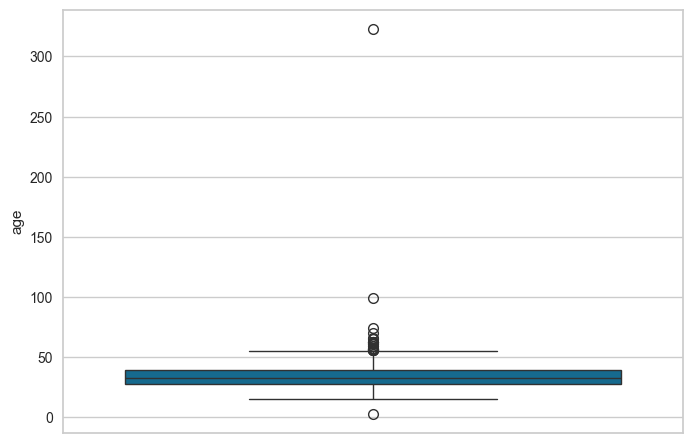

In [22]:
sns.boxplot(y=data['age'])

In [23]:
# Replace outliers with the mean value
data.loc[data['age'].isin([323, 3, 15, 99, 17]), 'age'] = round(data['age'].median()) 

### imputing missing values 

In [24]:
# Those respondents who are self-employed, haven't answered the next questions
# Therefore, we will impute nan values with 'Not applicable to me' value
data.loc[data.self_employed==1,'n_employees']= data['n_employees'].fillna(value='Not applicable to me')
data.loc[data.self_employed==1,'tech_company']= data['tech_company'].fillna(value=0)
data.loc[data.self_employed==1,'mh_benefits_provided'] = data['mh_benefits_provided'].fillna(value='Not applicable to me') 
data.loc[data.self_employed==1,'mh_formal_discussion'] = data['mh_formal_discussion'].fillna(value='Not applicable to me')
data.loc[data.self_employed==1,'mh_options_awareness'] = data['mh_options_awareness'].fillna(value='Not applicable to me')
data.loc[data.self_employed==1,'anonimity_protection'] = data['anonimity_protection'].fillna(value='Not applicable to me')
data.loc[data.self_employed==1,'medical_leave'] = data['medical_leave'].fillna(value='Not applicable to me')
data.loc[data.self_employed==1,'employer_mh_ph_reaction'] = data['employer_mh_ph_reaction'].fillna(value='Not applicable to me')
data.loc[data.self_employed==1,'observed_neg_conceq_coworker_mh'] = data['observed_neg_conceq_coworker_mh'].fillna(value='Not applicable to me')
data.loc[data.self_employed==1,'mh_resources_offered'] = data['mh_resources_offered'].fillna(value='Not applicable to me')
data.loc[data.self_employed==1,'comfort_discussion_mh_supervisor'] = data['comfort_discussion_mh_supervisor'].fillna(value='Not applicable to me')
data.loc[data.self_employed==1,'comfort_discussion_mh_coworkers'] = data['comfort_discussion_mh_coworkers'].fillna(value='Not applicable to me')
data.loc[data.self_employed==1,'neg_conceq_ph_employer_discussion'] = data['neg_conceq_ph_employer_discussion'].fillna(value='Not applicable to me')
data.loc[data.self_employed==1,'neg_conceq_mh_employer_discussion'] = data['neg_conceq_mh_employer_discussion'].fillna(value='Not applicable to me')

In [25]:
# Those respondents who don't have a previious employer, haven't answered the next questions
# Therefore, we will impute nan values with 'Not applicable to me' value
data.loc[data.previous_employers==0,'mh_benefits_prev_employer_provided'] = data['mh_benefits_prev_employer_provided'].fillna(value='Not applicable to me') 
data.loc[data.previous_employers==0,'aware_of_mh_options_prev_employer_provided'] = data['aware_of_mh_options_prev_employer_provided'].fillna(value='Not applicable to me')
data.loc[data.previous_employers==0,'mh_formal discussion_prev'] = data['mh_formal discussion_prev'].fillna(value='Not applicable to me')
data.loc[data.previous_employers==0,'mh_resources_offered_prev'] = data['mh_resources_offered_prev'].fillna(value='Not applicable to me')
data.loc[data.previous_employers==0,'anonimity_protection_prev'] = data['anonimity_protection_prev'].fillna(value='Not applicable to me')
data.loc[data.previous_employers==0,'prev_employer_mh_ph_reaction'] = data['prev_employer_mh_ph_reaction'].fillna(value='Not applicable to me')
data.loc[data.previous_employers==0,'observed_neg_conceq_prev_coworker_mh'] = data['observed_neg_conceq_prev_coworker_mh'].fillna(value='Not applicable to me')
data.loc[data.previous_employers==0,'mh_discussion_prev_coworkers_willingness'] = data['mh_discussion_prev_coworkers_willingness'].fillna(value='Not applicable to me')
data.loc[data.previous_employers==0,'mh_discussion_supervisor_willingness'] = data['mh_discussion_supervisor_willingness'].fillna(value='Not applicable to me')
data.loc[data.previous_employers==0,'neg_conceq_ph_prev_employer_discussion'] = data['neg_conceq_ph_prev_employer_discussion'].fillna(value='Not applicable to me')
data.loc[data.previous_employers==0,'neg_conceq_mh_prev_employer_discussion'] = data['neg_conceq_mh_prev_employer_discussion'].fillna(value='Not applicable to me')

In [26]:
# Those respondents who haven't observed or experienced an unsupportive response to a mental health issue, haven't answered the next question
# Therefore, we will impute nan values with 'Not applicable to me' value
data.loc[data.bad_response_mh_issue=='No','impact_others_revealed_mh_issues'] = data['impact_others_revealed_mh_issues'].fillna(value='Not applicable to me') 

In [27]:
# Assuming that if a respondent did not provide information about diagnosed conditions means they likely do not have a diagnosed condition
# Impute missing values in the 'diagnosed_professional_conditions' column by filling them with 'Not applicable to me'. 
data['diagnosed_professional_conditions'] = data['diagnosed_professional_conditions'].fillna(value='Not applicable to me')

In [28]:
# Fill in the last columns with the mode value
imp = SimpleImputer(strategy='most_frequent') 
imputed_data = imp.fit_transform(data)
imputed_data = pd.DataFrame(data=imputed_data)
imputed_data.columns=data.columns

In [29]:
# Save changes for further usage
cleaned_data=data

### encoding

In [30]:
# Ordinal encoding
imputed_data['remote_work'] = OrdinalEncoder(categories=[['Never','Sometimes','Always']]).fit_transform(imputed_data[['remote_work']])
imputed_data['n_employees'] = OrdinalEncoder(categories=[['Not applicable to me','1-5','6-25','26-100','100-500','500-1000','More than 1000']]).fit_transform(imputed_data[['n_employees']])
imputed_data['work_interference_treated_effectively'] = OrdinalEncoder(categories=[['Not applicable to me','Never','Rarely','Sometimes','Often']]).fit_transform(imputed_data[['work_interference_treated_effectively']])
imputed_data['work_interference_not_treated_effectively'] = OrdinalEncoder(categories=[['Not applicable to me','Never','Rarely','Sometimes','Often']]).fit_transform(imputed_data[['work_interference_not_treated_effectively']])
imputed_data['medical_leave'] = OrdinalEncoder(categories=[['Not applicable to me',"I don't know",'difficult','medium','easy']]).fit_transform(imputed_data[['medical_leave']])
imputed_data['mh_discussion_family_willingness'] = OrdinalEncoder(categories=[["Not applicable to me",'not open','Neutral','open']]).fit_transform(imputed_data[['mh_discussion_family_willingness']])

In [31]:
# Binary encoding
imputed_data['diagnosed_professional'] = imputed_data['diagnosed_professional'].map({'Yes': 1, 'No': 0})

In [32]:
# One hot encoding
diagnosed_professional_conditions=imputed_data['diagnosed_professional_conditions'].str.get_dummies(sep='|')
diagnosed_professional_conditions = diagnosed_professional_conditions.add_prefix('diagnosed_professional_')
imputed_data=imputed_data.join(diagnosed_professional_conditions)
imputed_data=imputed_data.drop('diagnosed_professional_conditions',axis=1)


roles=imputed_data['work_position'].str.get_dummies(sep='|')
imputed_data=imputed_data.join(roles)
imputed_data=imputed_data.drop('work_position',axis=1)

In [33]:
# Dummy encodung 
columns_to_encode=['country_work','gender','mh_benefits_provided','current_mh_disorder','past_mh_disorders','family_history_mental_illness',
                   'impact_others_revealed_mh_issues','bad_response_mh_issue',
                   'mh_issue_neg_relationship_coworkers','observed_neg_conceq_coworker_mh',
                   'mh_diagnosed_career_affect','interview_mh_discussion_willingness','interview_ph_discussion_willingness','prev_employer_mh_ph_reaction',
                   'mh_discussion_supervisor_willingness','mh_discussion_prev_coworkers_willingness','neg_conceq_ph_prev_employer_discussion',
                   'neg_conceq_mh_prev_employer_discussion','anonimity_protection_prev','mh_resources_offered_prev','mh_formal discussion_prev',
                   'aware_of_mh_options_prev_employer_provided','mh_benefits_prev_employer_provided','employer_mh_ph_reaction','comfort_discussion_mh_supervisor',
                   'comfort_discussion_mh_coworkers','neg_conceq_ph_employer_discussion','neg_conceq_mh_employer_discussion','anonimity_protection',
                   'mh_resources_offered','mh_formal_discussion','mh_options_awareness','mh_benefits_provided','observed_neg_conceq_prev_coworker_mh',
                   'tech_company']
encoded_data=pd.get_dummies(data=imputed_data,prefix=columns_to_encode, columns=columns_to_encode, drop_first=True,dtype=int)

In [34]:
encoded_data.shape

(1433, 146)

In [35]:
encoded_data.skew().sort_values(ascending=False)

diagnosed_professional_intimate disorder                                           37.854986
diagnosed_professional_gender dysphoria                                            26.739445
diagnosed_professional_psychotic disorder (schizophrenia, schizoaffective, etc)    12.512243
diagnosed_professional_dissociative disorder                                       11.857542
diagnosed_professional_autism                                                      11.857542
                                                                                     ...    
Developer                                                                           -0.59623
country_work_North America                                                         -0.621757
mh_discussion_family_willingness                                                   -0.970238
gender_male                                                                        -1.085468
previous_employers                                                    

We can see that the distributions of the variables are skewed. Positive values mean that the distribution is right-skewed, negative indicates that the distribution is left-skewed. Therefore, we will use RobustScaler to standardize the data, which is advantageous for skewed data and data with outliers.

## Dimensionality Reduction

### standartization

In [36]:
# Standardize the data
scaler = RobustScaler() 
scaled_data = scaler.fit_transform(encoded_data) 

### principal component analysis

In [37]:
# Create a PCA object
pca = PCA(0.80) 
# Fit the PCA model to the scaled DataFrame
transformed_data=pca.fit_transform(scaled_data)
transformed_data.shape

(1433, 36)

Using 36 principal components we can describe the variability of 80% of the original data

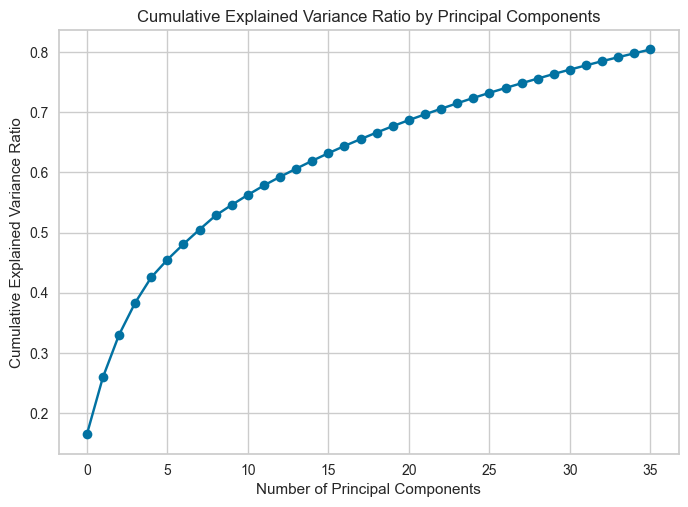

In [38]:
# Plot explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

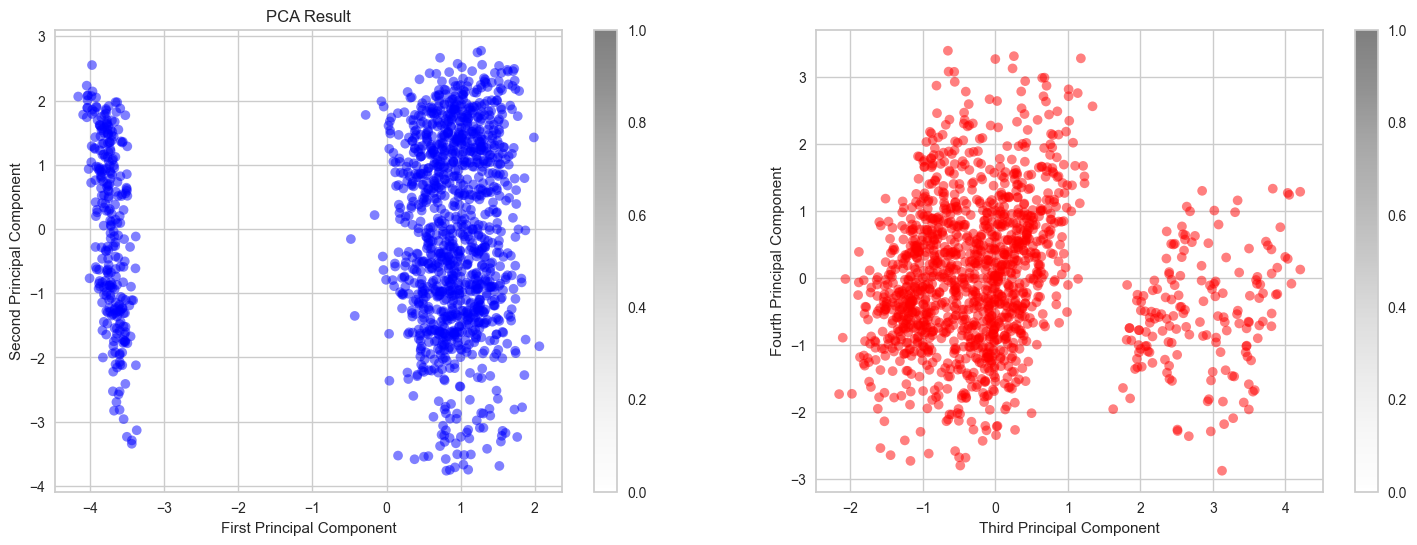

In [39]:
# Create a scatter plot of the first four principal components
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 2], transformed_data[:, 3], c="red", edgecolor='none', alpha=0.5)
plt.xlabel('Third Principal Component')
plt.ylabel('Fourth Principal Component')
plt.colorbar()

plt.subplot(1, 2, 1)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c="blue",edgecolor='none', alpha = 0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.colorbar()
plt.show()

## Clastering 

### Gaussian Mixture Model

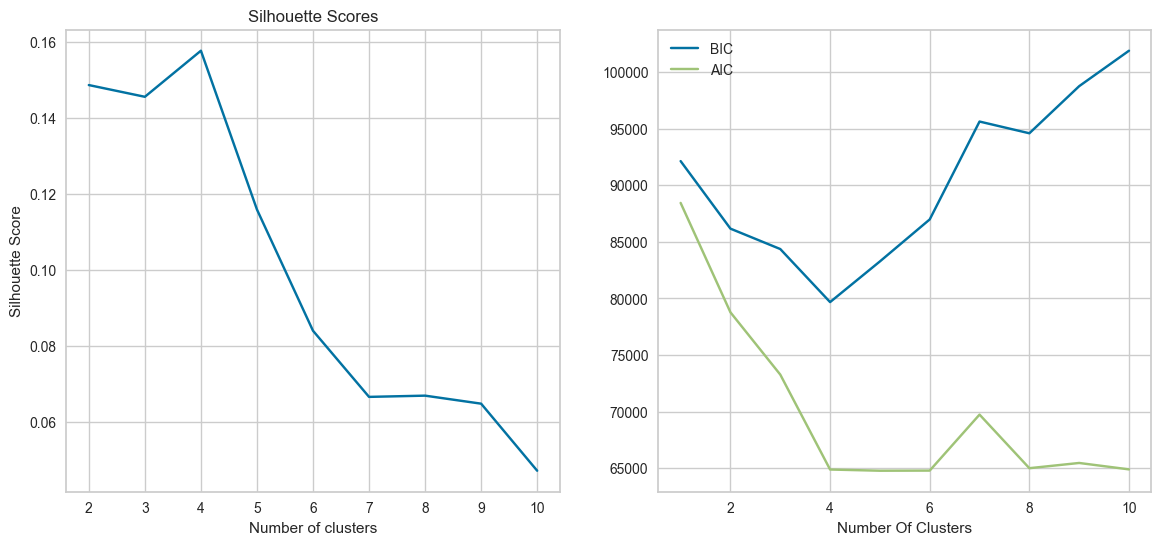

In [40]:
# GMM model selection
n_conponent = np.arange(1,11)

# Create GGM Model
models = [GaussianMixture(n_components = n,init_params='k-means++',random_state=42).fit(transformed_data) for n in n_conponent]

# Function to calculate the average silhouette score
def calculate_silhouette(data):
    silhouette = []
    for n in range(2, 11):  
        gmm = GaussianMixture(n_components=n,init_params='k-means++',random_state=42)
        cluster_labels = gmm.fit_predict(data)
        score = silhouette_score(data, cluster_labels)
        silhouette.append(score)
    return silhouette

# Calculate Silhouette scores
silhouette = calculate_silhouette(transformed_data)

# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(n_conponent,[m.bic(transformed_data) for m in models],label = 'BIC')
plt.plot(n_conponent,[m.aic(transformed_data) for m in models],label = 'AIC')
plt.legend()
plt.xlabel("Number Of Clusters")
plt.show()

 By the above plots, we can see that the BIC stops decreasing after k=4 clusters, where Silhouette score reaches it's peak. Hence, k=4 can be considered a good number of the clusters.

In [41]:
# Create GGM Model
gmm = GaussianMixture(n_components = 4,init_params='k-means++',random_state=42) 
cluster_gmm = gmm.fit_predict(transformed_data)

In [42]:
# See sizes of the clusters
np.unique(cluster_gmm, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([513, 502, 287, 131], dtype=int64))

### K-means clustering

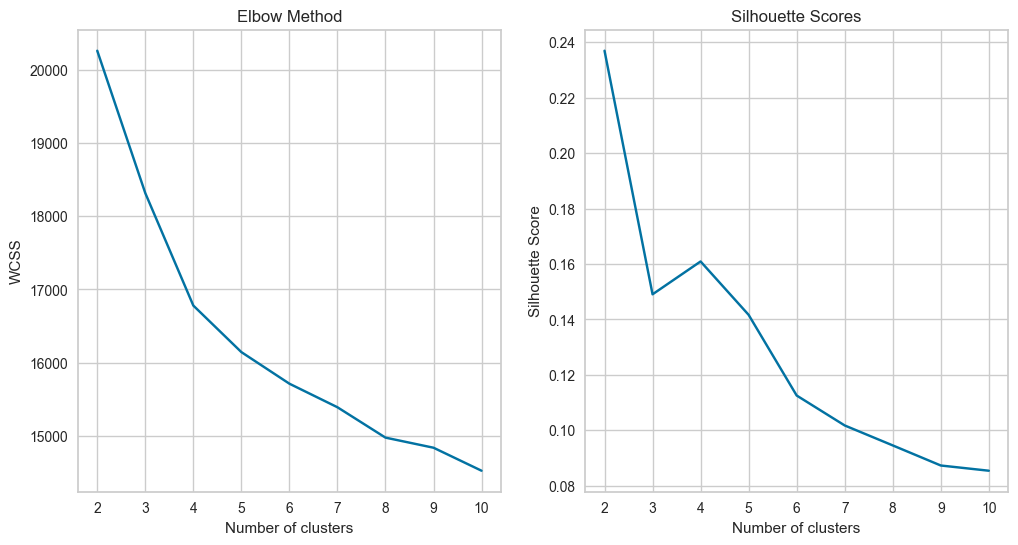

In [43]:
# K-means model selection
# Function to calculate the within-cluster sum of squares (inertia)
def calculate_wcss(data):
    wcss = []
    for n in range(2, 11): 
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Function to calculate the average silhouette score
def calculate_silhouette(data):
    silhouette = []
    for n in range(2, 11):  
        kmeans = KMeans(n_clusters=n, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        score = silhouette_score(data, cluster_labels)
        silhouette.append(score)
    return silhouette

# Calculate WCSS and Silhouette scores
wcss = calculate_wcss(transformed_data)
silhouette = calculate_silhouette(transformed_data)

plt.figure(figsize=(12, 6))

# Plot WCSS (Elbow Method)
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()

By the above plot, we can see that there is a kink at k=4. Hence k=4 can be considered a good number of the clusters.

In [44]:
# Create K-means Model
kmeans = KMeans(n_clusters=4,  random_state=42).fit(transformed_data)

In [45]:
# See sizes of the clusters
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([546, 469, 287, 131], dtype=int64))

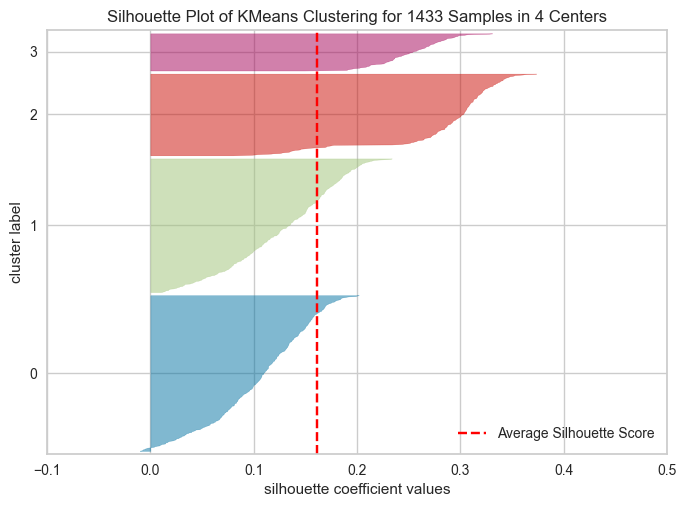

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1433 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
# Generate, fit and show a Silhouette visualizer for different number of clusters
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(transformed_data)
visualizer.show()

From the plot above, it can be seen that there is some of wrong-clustering, as indicated by the negative values.

### Agglomerative clustering

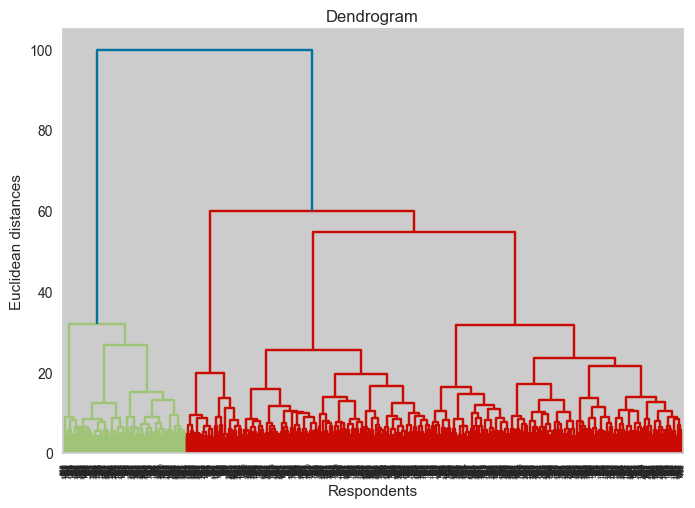

In [47]:
dendrogram = sch.dendrogram(sch.linkage(transformed_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Respondents')
plt.ylabel('Euclidean distances')
plt.show()

From the above dendogram, we can see that the optimal threshold distance is 40 with number of clusters k=4

In [48]:
# Create Agglomerative Clustering 
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg = agg_cluster.fit_predict(transformed_data)

In [49]:
# See sizes of the clusters
np.unique(agg, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([287, 581, 131, 434], dtype=int64))

### Selecting the best model

In [50]:
# Calculate clustering metrics 
gmm_sil_score = silhouette_score(transformed_data, gmm.fit_predict(transformed_data))
kmeans_sil_score = silhouette_score(transformed_data, kmeans.labels_)
agg_sil_score = silhouette_score(transformed_data, agg_cluster.fit_predict(transformed_data))

# Print the metric scores 
print("GMM Silhouette Score = ",gmm_sil_score)
print("K-means Silhouette Score = ",kmeans_sil_score)
print("Agglomerative clustering Silhouette Score = ",agg_sil_score)

GMM Silhouette Score =  0.15760860953178046
K-means Silhouette Score =  0.16092530611408631
Agglomerative clustering Silhouette Score =  0.1521183818331017


Comparing by the Silhouette Score, we can see that clusters are better separated by the K-means clustering.\
Thus, acknowledging that there is still room for improvement, we will choose the K-means model, whose results show that there is some distinction between the clusters.

In [51]:
label=pd.DataFrame(kmeans.labels_)
# Add 1 to start count labels from 1
cleaned_data['label']=label+1

## Analysis

After joining cluster label with the original data we can generate plots to see the distributions for each individual cluster by feature.  

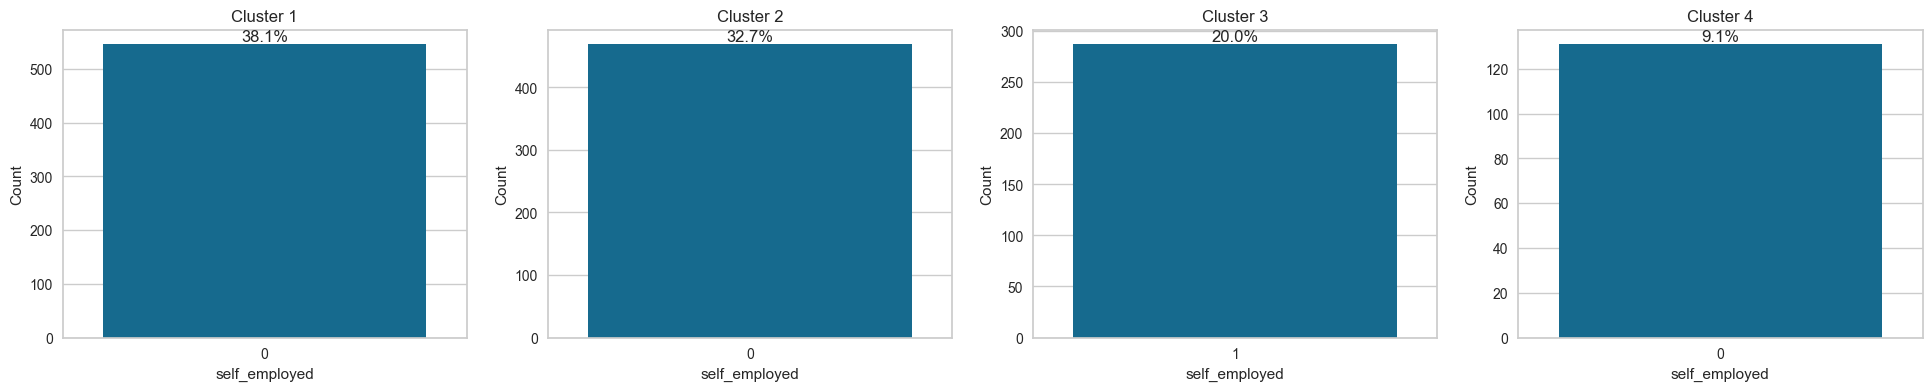

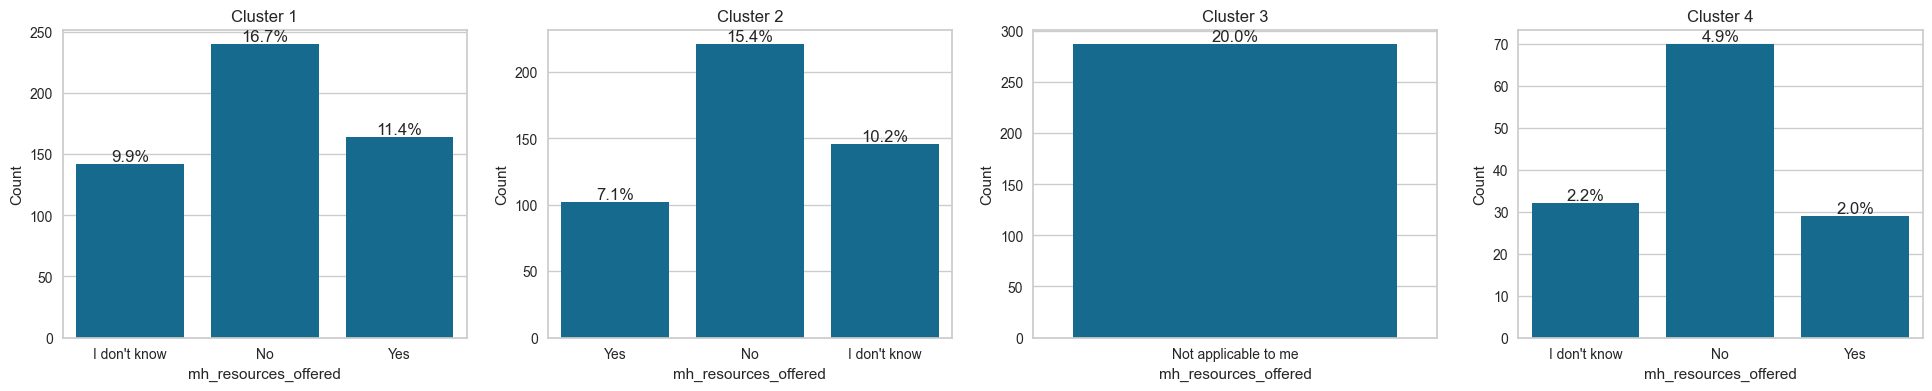

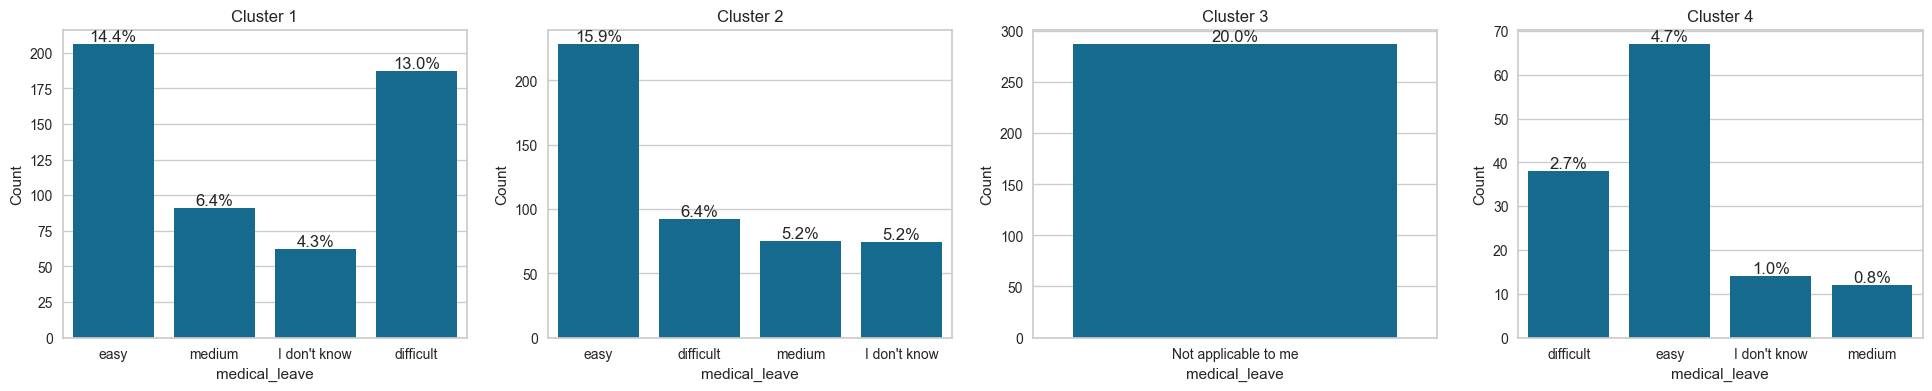

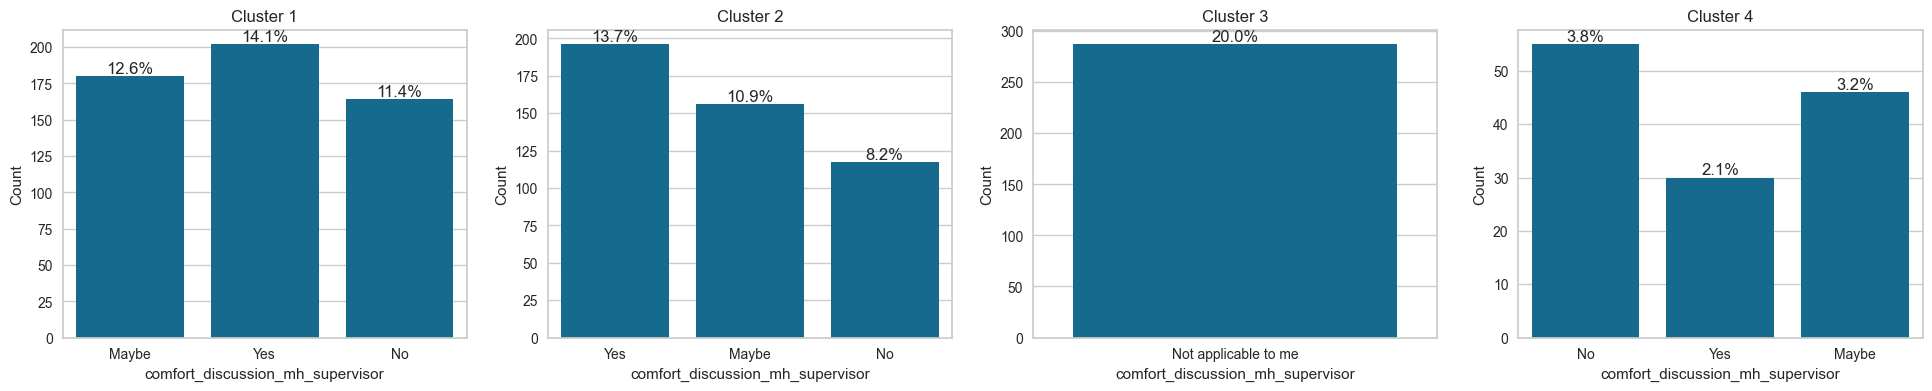

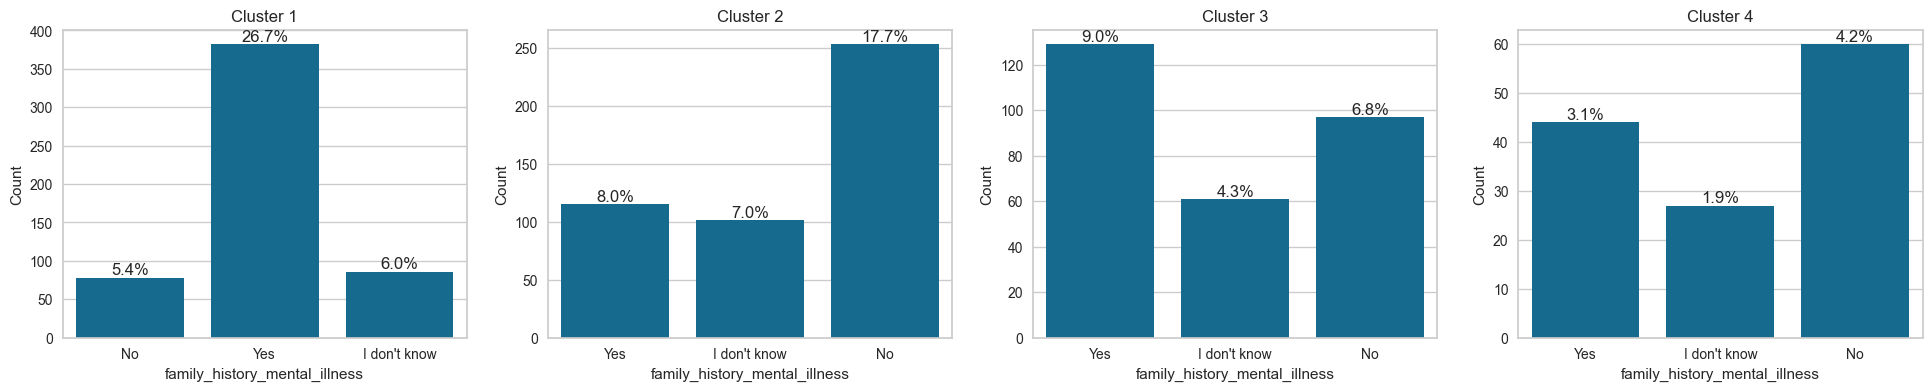

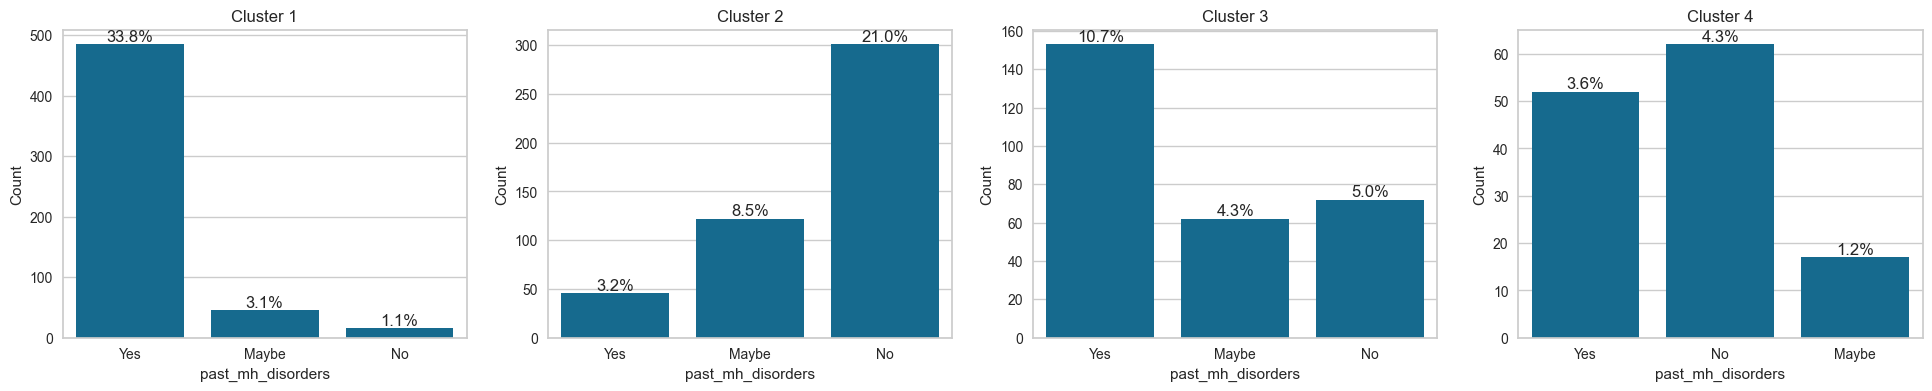

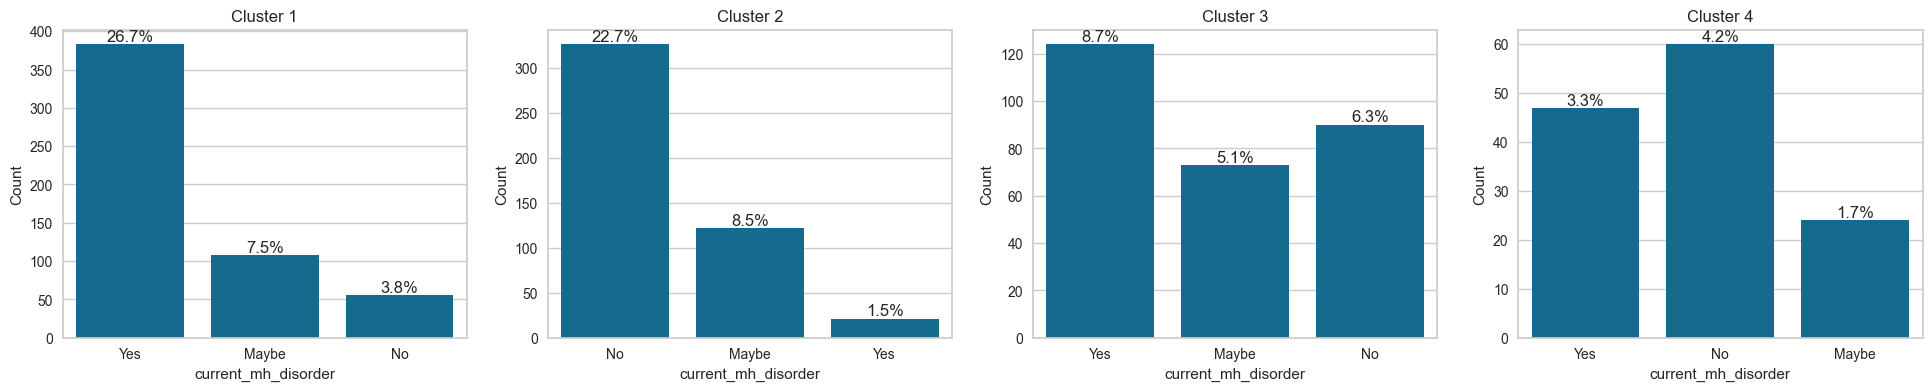

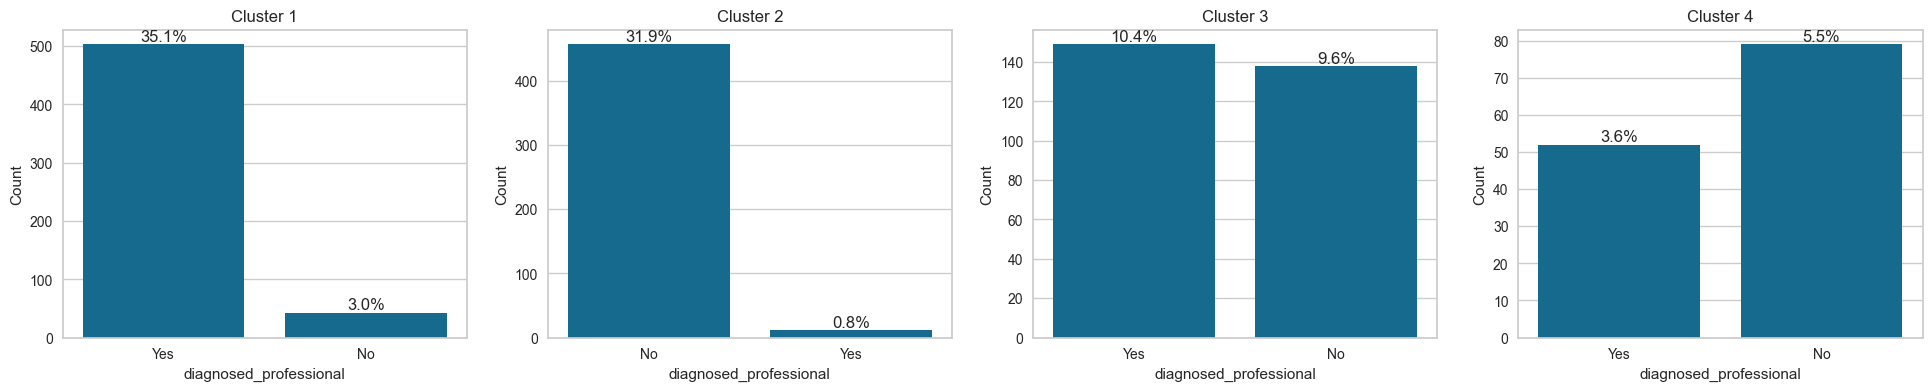

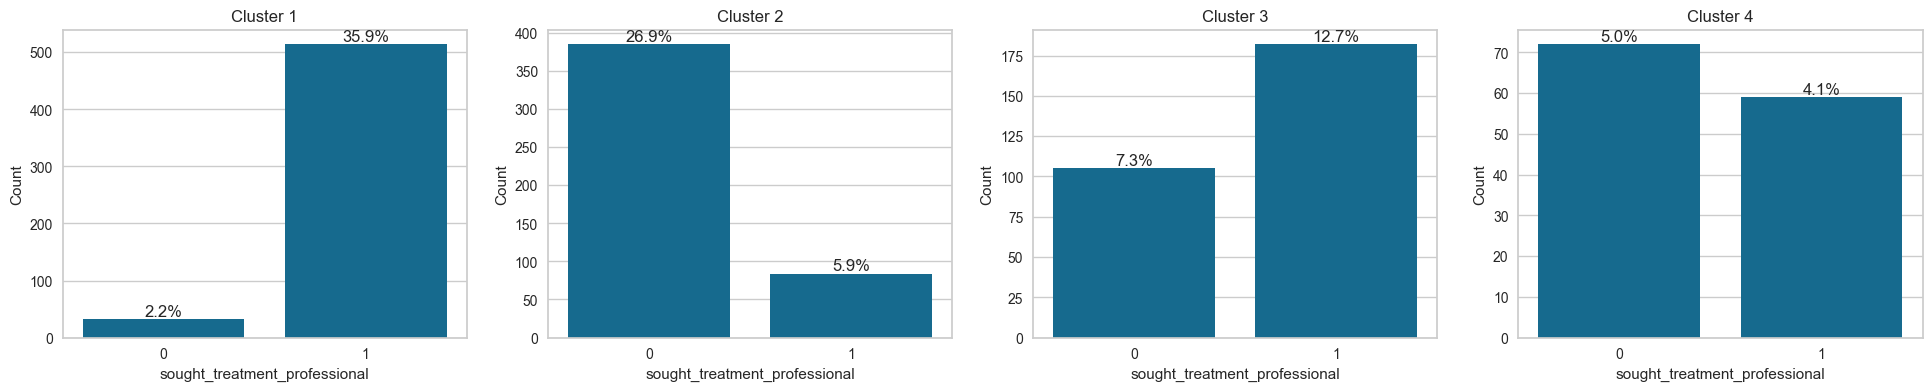

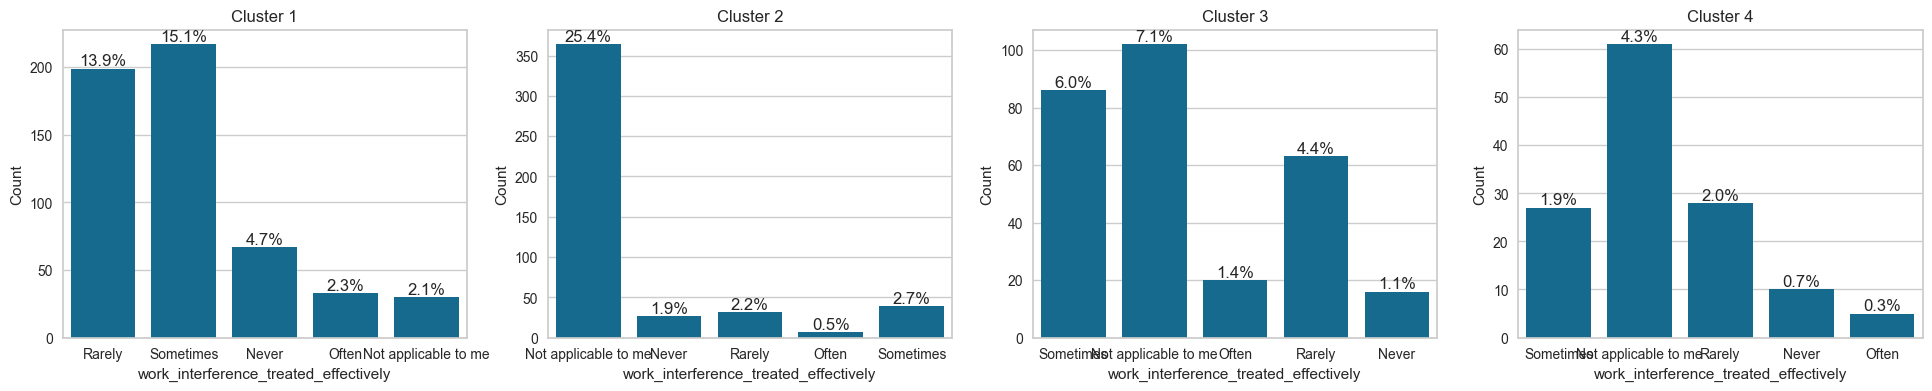

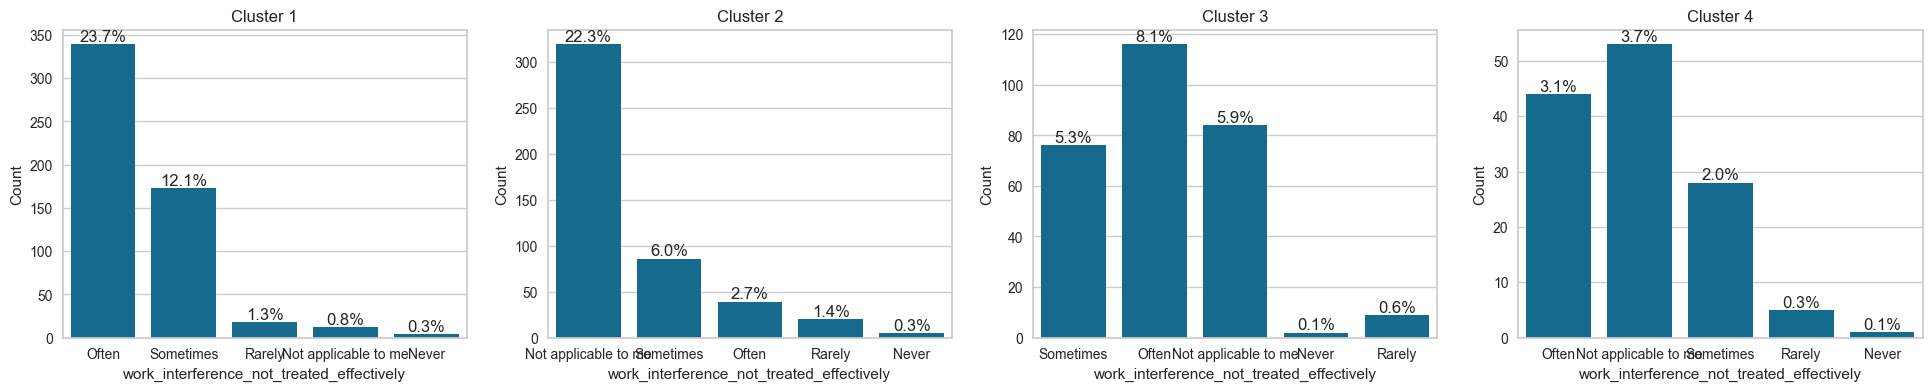

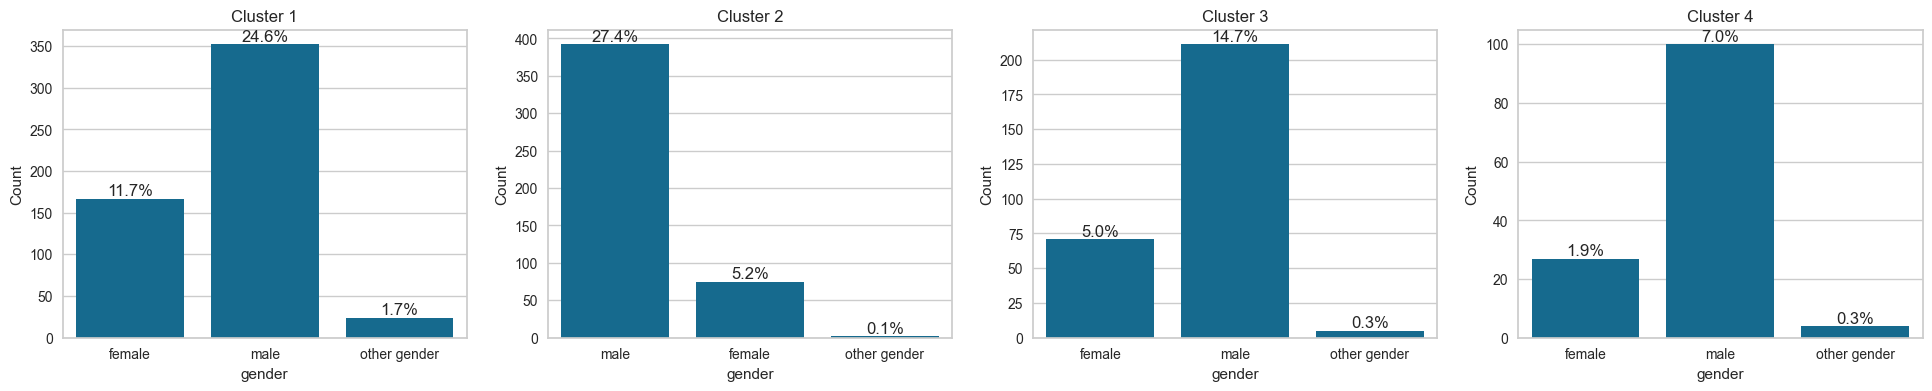

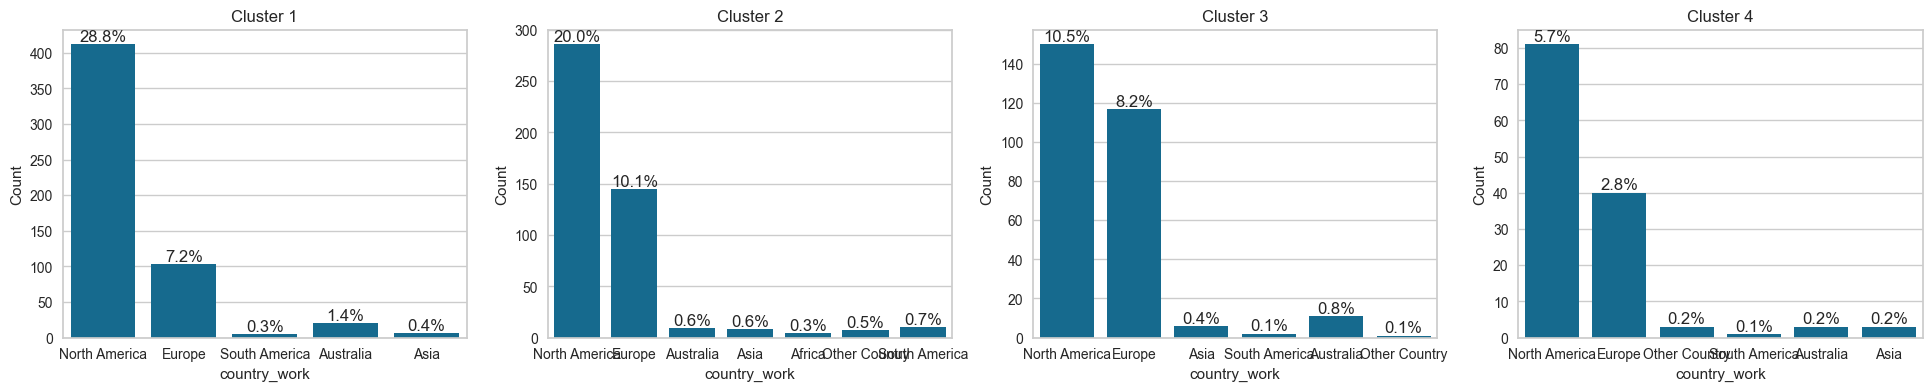

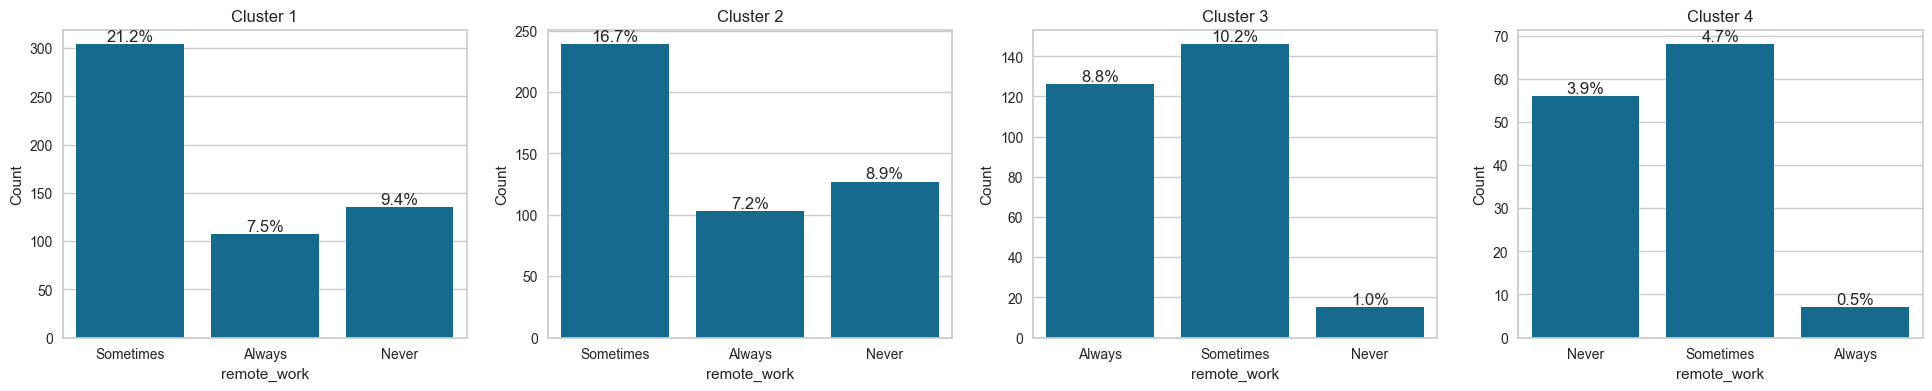

In [52]:
# Visualize clusters across some of the features
features = ['self_employed','mh_resources_offered','medical_leave','comfort_discussion_mh_supervisor',
            'family_history_mental_illness','past_mh_disorders', 'current_mh_disorder',
            'diagnosed_professional','sought_treatment_professional','work_interference_treated_effectively',
            'work_interference_not_treated_effectively','gender','country_work','remote_work']
# Sort data by the cluster label
cleaned_data=cleaned_data.sort_values('label')
for f in features:
    plt.figure(figsize=(24, 4))
    # Create subplots for each cluster
    for i, cluster in enumerate(cleaned_data['label'].unique(), 1):
        plt.subplot(1, len(cleaned_data['label'].unique()), i)
        ax=sns.countplot(data=cleaned_data[cleaned_data['label'] == cluster], x=f)
        ax.set(ylabel='Count', title=f'Cluster {cluster}')
        # Add annotations
        for c in ax.containers:
        # Label calculates percent and add an empty string so 0 value bars don't have a number
            labels = [f'{h/cleaned_data.label.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge')
    plt.show()

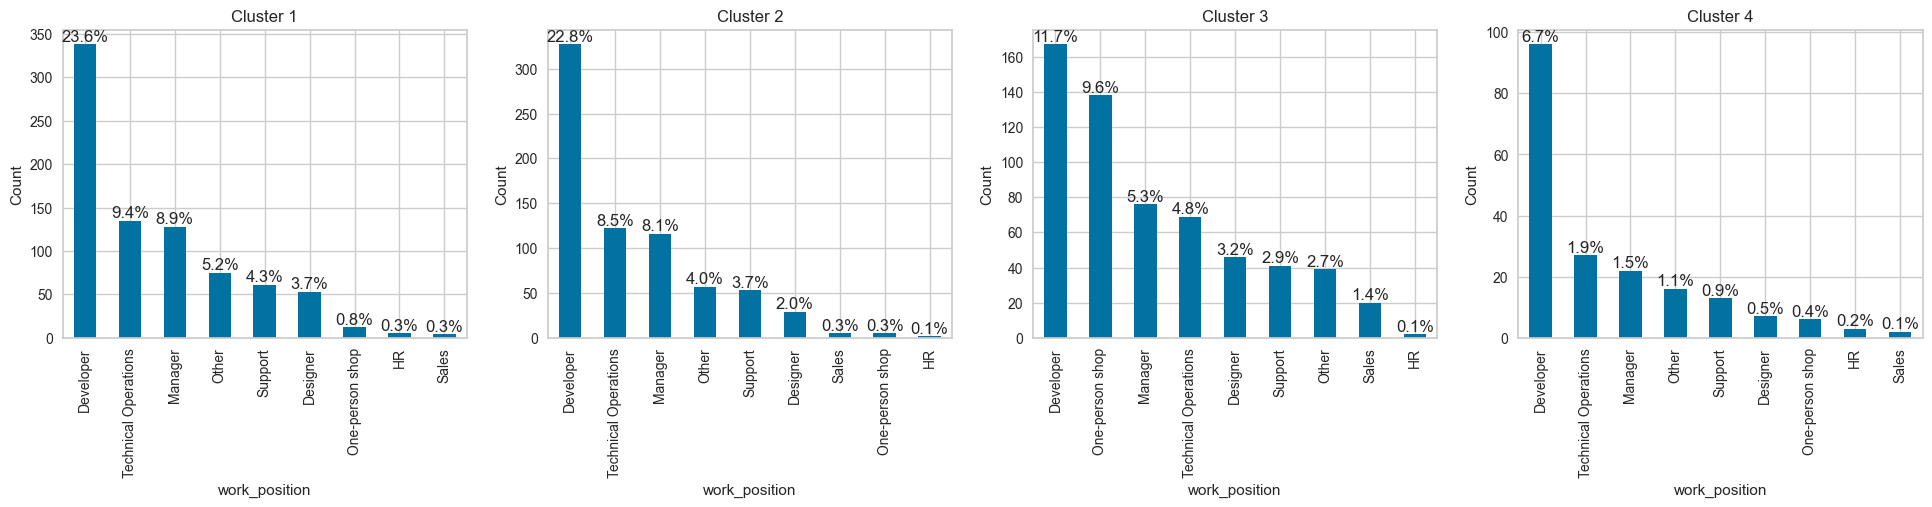

In [53]:
feature = "work_position"

plt.figure(figsize=(24, 4))
# Create subplots for each cluster
for i, label in enumerate(cleaned_data['label'].unique(), 1):
    plt.subplot(1, len(cleaned_data['label'].unique()), i)
    position_count = get_categories_freq(cleaned_data.loc[cleaned_data.label==label,feature])
    position_count_series = pd.Series(position_count)
    position_count_series = position_count_series.sort_values(ascending=False)
    ax=position_count_series.plot(kind='bar')
    ax.set(ylabel='Count',xlabel='work_position', title=f'Cluster {cluster}')
    # add annotations
    for c in ax.containers:
        labels = [f'{h/cleaned_data.label.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    plt.title(f'Cluster {label}')
plt.show()

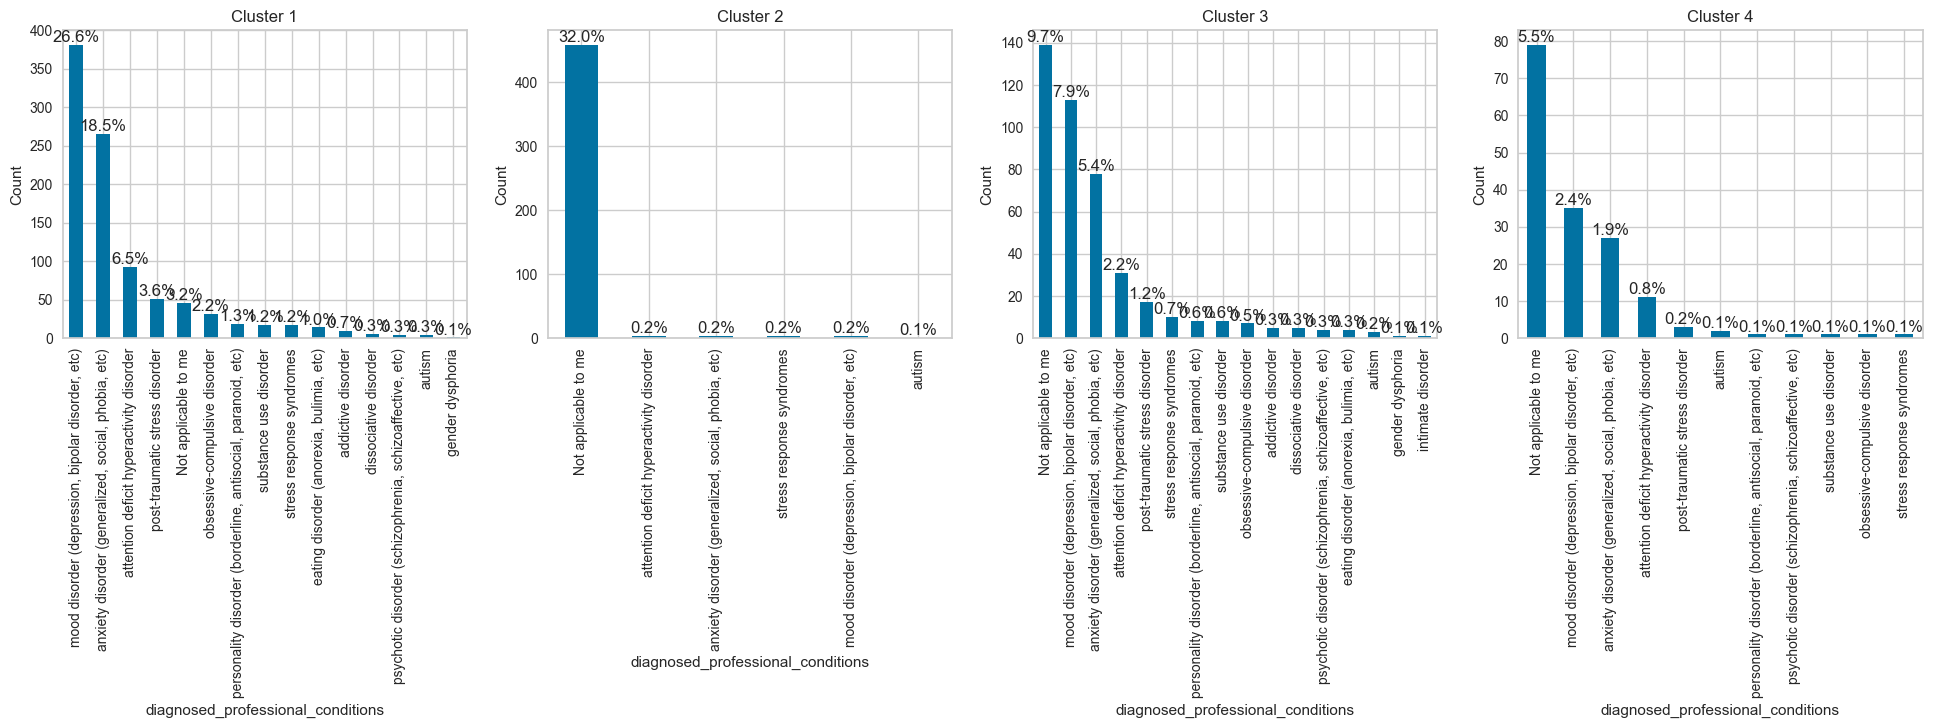

In [54]:
feature = 'diagnosed_professional_conditions'
plt.figure(figsize=(24, 4))
# Create subplots for each cluster
for i, label in enumerate(cleaned_data['label'].unique(), 1):
    plt.subplot(1, len(cleaned_data['label'].unique()), i)
    condition_count = get_categories_freq(cleaned_data.loc[cleaned_data.label==label,feature])
    condition_count_series = pd.Series(condition_count)
    condition_count_series = condition_count_series.sort_values(ascending=False)
    ax=condition_count_series.plot(kind='bar')
    ax.set(ylabel='Count',xlabel='diagnosed_professional_conditions', title=f'Cluster {cluster}')
    # add annotations
    for c in ax.containers:
        labels = [f'{h/cleaned_data.label.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    plt.title(f'Cluster {label}')
plt.show()

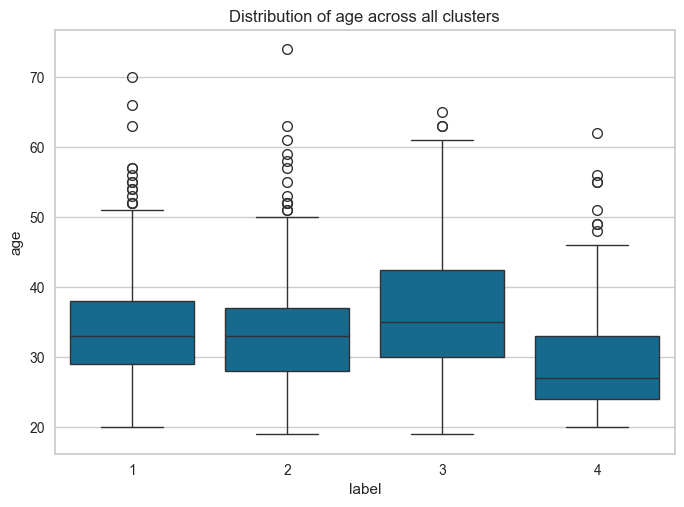

In [55]:
feature = "age"
# Create box plot with hue as cluster
sns.boxplot(x=cleaned_data['label'], y=feature, data=cleaned_data)
plt.title(f'Distribution of {feature} across all clusters')
plt.show()